## Scratch file for converting every network to JSON

In [3]:
import networkx as nx
from networkx.algorithms import bipartite
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json

from IPython import display

In [4]:
df_treaties = pd.read_csv('data/mytreaties.csv')
df_treaties


,State,Affiliation,treaty
0,Argentina,Treaty1,Treaty1
1,Belgium,NaN,Treaty2
2,China,Treaty1,Treaty3
3,Denmark,NaN,NaN
4,Ecuador,NaN,NaN
5,Finland,Treaty1,NaN
6,Guyana,NaN,NaN
7,Netherlands,NaN,NaN
8,Paraguay,Treaty1,NaN
9,South Africa,NaN,NaN


In [5]:
g_treaties = nx.Graph()


In [7]:
for i in df_treaties.State:
    g_treaties.add_node(i, bipartite=0)

In [11]:
for i in df_treaties.treaty:
    if pd.isna(i) == False:
        g_treaties.add_node(i, bipartite=1)
    
#    g_treaties.add_node(i, bipartite=0)

In [12]:
for i, j in zip(df_treaties.State, df_treaties.Affiliation):
    if pd.isna(j) == False:
        g_treaties.add_edge(i,j)

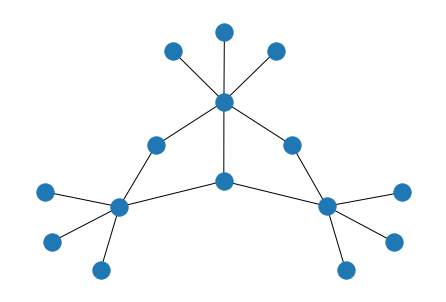

In [13]:
nx.draw(g_treaties)

In [15]:
data = nx.node_link_data(g_treaties)

In [17]:
f = open("data/g_treaties2.json", "w")
json.dump(data, f)
f.close()

In [18]:
df_consprot = pd.read_csv('data/PROT_edges.csv', sep = ",")
g_consprot = nx.from_pandas_edgelist(df_consprot, "Source", "Target", create_using=nx.DiGraph) #setting up the directed graph


In [21]:
data2 = nx.node_link_data(g_consprot)

In [22]:
f = open("data/g_consprot2.json", "w")
json.dump(data2, f)
f.close()

In [24]:
df_docs = pd.read_csv('data/docsimilarity.csv', index_col="Unnamed: 0")

g_docs = nx.Graph()
[g_docs.add_node(node) for node in df_docs.source]
[g_docs.add_edge(node,edge, weight = weight) for node, edge, weight in zip(df_docs.source, df_docs.target, df_docs.weight)]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [25]:
data3 = nx.node_link_data(g_docs)

In [26]:
data3

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8}],
 'links': [{'weight': 0.3057850860342909, 'source': 0, 'target': 1},
  {'weight': 0.3515643806261561, 'source': 0, 'target': 2},
  {'weight': 0.4011441744419861, 'source': 0, 'target': 3},
  {'weight': 0.8588650335933432, 'source': 0, 'target': 4},
  {'weight': 0.5663867925847853, 'source': 0, 'target': 5},
  {'weight': 0.3036944274298017, 'source': 0, 'target': 6},
  {'weight': 0.1427956434168483, 'source': 0, 'target': 7},
  {'weight': 0.2663586423650602, 'source': 0, 'target': 8},
  {'weight': 0.1887291756697731, 'source': 1, 'target': 2},
  {'weight': 0.2301873550390033, 'source': 1, 'target': 3},
  {'weight': 0.800124882934437, 'source': 1, 'target': 4},
  {'weight': 0.4122354734424759, 'source': 1, 'target': 5},
  {'weight': 0.5097321851655097, 'source': 1, 'target': 6},
  {'weight': 0.30278666191202

In [27]:
f = open("data/g_docs.json", "w")
json.dump(data3, f)
f.close()

In [28]:
df_trains = pd.read_csv('data/trainnetworknl.csv', names=['origin', 'destination'])
g_trains = nx.Graph()
[g_trains.add_node(node) for node in df_trains.origin]
[g_trains.add_edge(node,edge) for node, edge in zip(df_trains.origin, df_trains.destination)]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

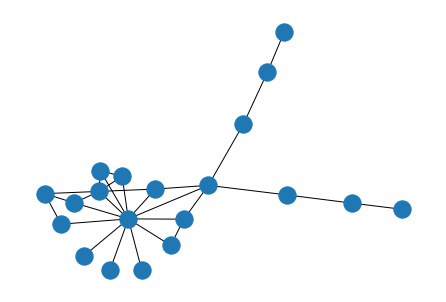

In [29]:
nx.draw(g_trains)

In [30]:
data_trains = nx.node_link_data(g_trains)

In [31]:
f = open("data/g_trains.json", "w")
json.dump(data_trains, f)
f.close()